In [124]:
# Import packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [125]:
# Adjust default matplotlib settings
plt.style.use('tableau-colorblind10')
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.titlepad'] = 10
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['font.family'] = 'sans-serif'

### 1. Average Salary per Role

In [127]:
# Read csv
df_avg_salaries = pd.read_csv('./data/1_avg_salary.csv')

In [128]:
# Create new column to display salary in 1000s
df_avg_salaries['avg_yearly_salary_1000'] = df_avg_salaries['avg_yearly_salary'] / 1000

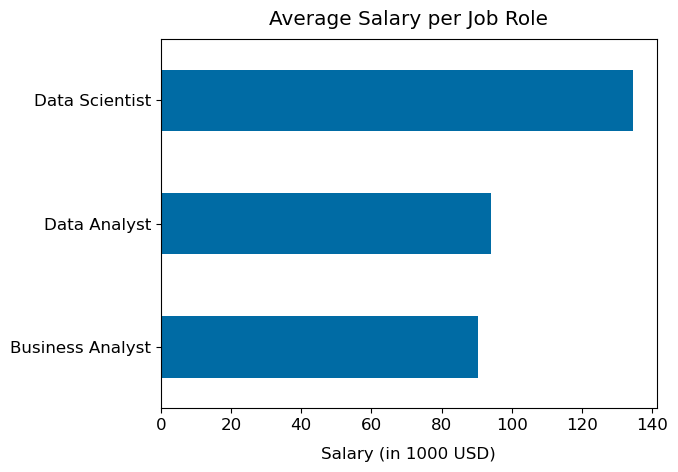

In [129]:
# Plot
df_avg_salaries.plot(x='role', y='avg_yearly_salary_1000', kind='barh',
                     xlabel='Salary (in 1000 USD)', ylabel='', legend='',
                     title='Average Salary per Job Role');

### 2. Top Skills per Role

In [139]:
# Read data
df_skills = pd.read_csv('./data/2_skills.csv')

In [140]:
# Group df by role and find 5 most common skills
df_skills_grouped = df_skills.groupby('role') \
    .apply(lambda x: x.nlargest(5, 'demand_count'), include_groups=False) \
    .reset_index(drop=False) \
    .drop('level_1', axis=1)

In [151]:
# Write helper function for plot
def plot_by_role(df_skills_grouped, role, ax, x_axis, x_label):
    temp = df_skills_grouped[df_skills_grouped['role'] == role].sort_values(by=x_axis, ascending=True)
    ax.barh(temp['skills'], temp[x_axis])
    ax.set_title(role)
    ax.set_xlabel(x_label)

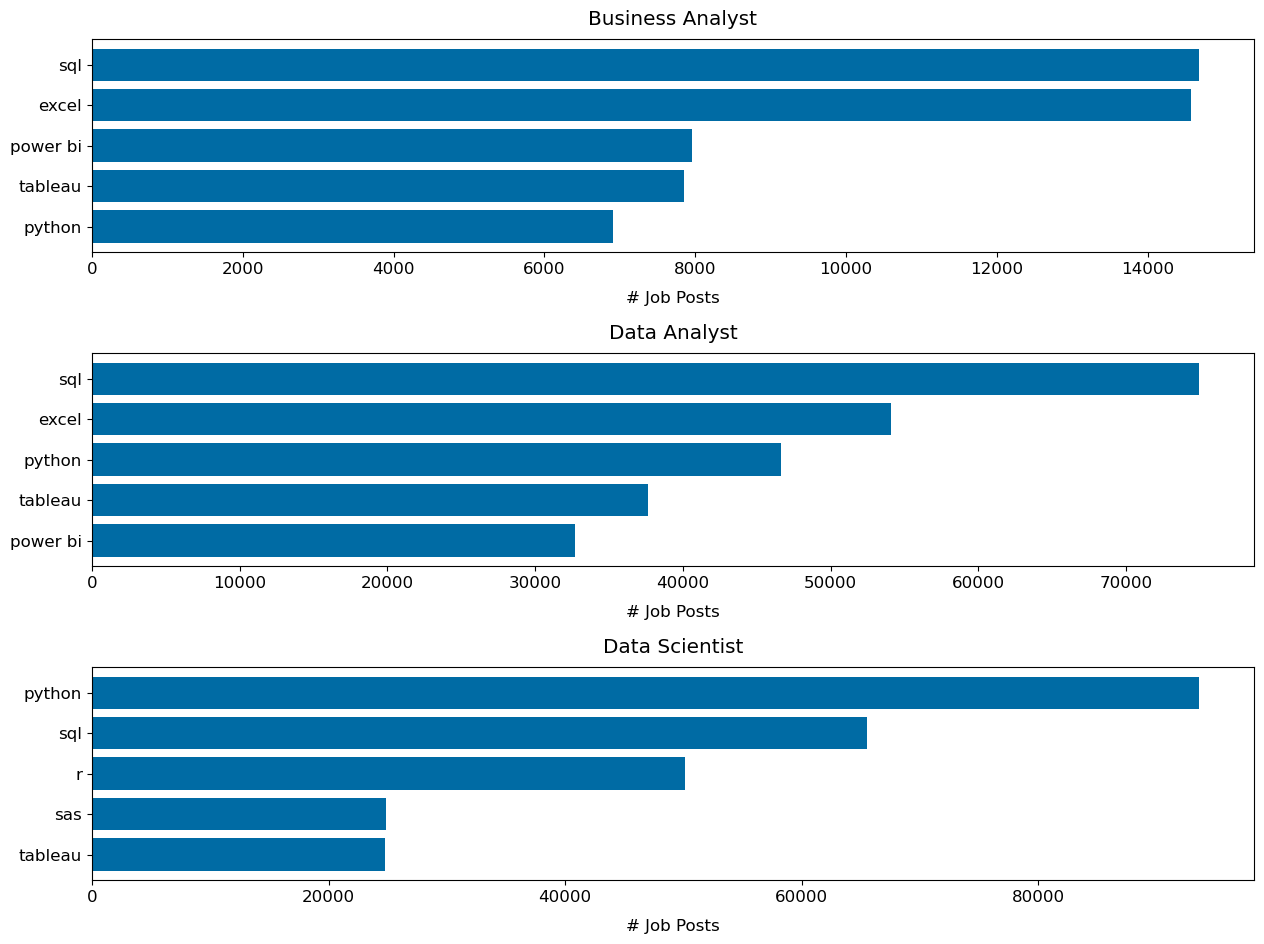

In [152]:
# Plot
_, axes = plt.subplots(3, 1)

for i, role in enumerate(df_skills_grouped['role'].unique()):
    plot_by_role(df_skills_grouped, role, axes[i], 'demand_count', '# Job Posts')

plt.tight_layout(rect=[-1, -1, 1, 1])

### 3. Top Paying Skills per Role

In [153]:
# Read data
df_pay_skills = pd.read_csv('./data/3_top_paid_skills.csv')

In [154]:
# Group df by role and find 5 highest-paying skills
df_pay_skills_grouped = df_pay_skills.groupby('role') \
    .apply(lambda x: x.nlargest(5, 'avg_yearly_salary'), include_groups=False) \
    .reset_index(drop=False) \
    .drop('level_1', axis=1)

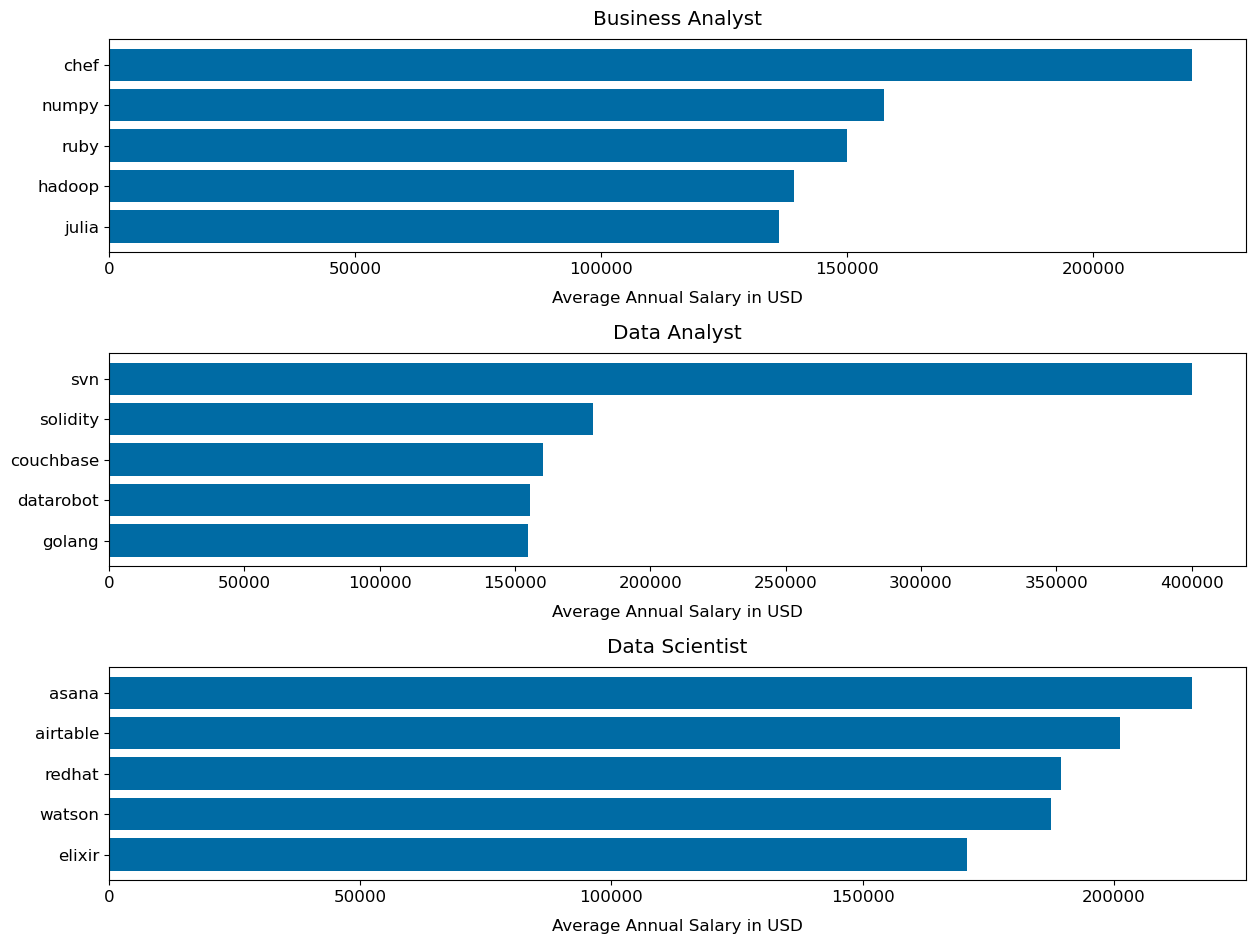

In [155]:
# Plot
_, axes = plt.subplots(3, 1)

for i, role in enumerate(df_pay_skills_grouped['role'].unique()):
    plot_by_role(df_pay_skills_grouped, role, axes[i], 'avg_yearly_salary', 'Average Annual Salary in USD')

plt.tight_layout(rect=[-1, -1, 1, 1])